In [1]:
f = open("./M1109BUSM293NNBR.csv", "r").read()

In [43]:
import numpy as np
import pandas as pd

class GBMSimulator:
    def __init__(self, historical_returns: pd.DataFrame):
        """
        historical_returns: DataFrame with columns as indices and rows as monthly returns (in decimal form, e.g., 0.01 for 1%)
        """
        self.historical_returns = historical_returns
        self.params = self._estimate_gbm_params()

    def _estimate_gbm_params(self):
        """
        Estimate drift (mu) and volatility (sigma) per index.
        """
        params = {}
        for index in self.historical_returns.columns:
            returns = self.historical_returns[index].dropna()
            mu = returns.mean()
            sigma = returns.std()
            params[index] = {'mu': mu, 'sigma': sigma}
        return params

    def simulate(self, n_months: int, seed: int):
        """
        Simulate GBM paths for each index.
        Returns: dict of index_name -> np.array of simulated returns (starting at time 1).
        """
        np.random.seed(seed)
        simulations = {}

        for index, param in self.params.items():
            mu, sigma = param['mu'], param['sigma']
            # Generate random standard normal values
            z = np.random.normal(size=n_months)
            # GBM log returns: log(1 + r_t)
            log_returns = (mu - 0.5 * sigma**2) + sigma * z
            # Convert log returns to arithmetic returns
            returns = np.exp(log_returns) - 1
            simulations[index] = returns

        return simulations

    def get_simulated_return(self, index: str, seed: int, t: int, n_months=240):
        """
        Get the simulated return at month t for given index and seed.
        """
        if index not in self.params:
            raise ValueError(f"Index '{index}' not found in historical data.")
        if t >= n_months:
            raise ValueError(f"t={t} is beyond the simulated range of {n_months} months.")

        sim_returns = self.simulate(n_months, seed)
        return sim_returns[index][t]


In [48]:
import pandas as pd

def load_returns_from_csv(file_path: str, index_name: str = 'Index'):
    """
    Loads a CSV with 'date' and 'value' columns and returns a DataFrame
    with monthly returns, suitable for GBMSimulator.

    The result will be a DataFrame with a single column named after the index.
    """
    df = pd.read_csv(file_path, parse_dates=['observation_date'])
    df = df.sort_values('observation_date')

    # Calculate returns
    df['return'] = df['M1109BUSM293NNBR'].pct_change()

    # Drop the first row with NaN
    df = df.dropna(subset=['return'])

    # Format into DataFrame for simulator
    df_returns = df[['observation_date', 'return']].copy()
    df_returns.set_index('observation_date', inplace=True)
    df_returns.columns = [index_name]

    return df_returns


In [49]:
# Replace 'your_file.csv' with your actual file path
df_returns = load_returns_from_csv('./M1109BUSM293NNBR.csv', index_name='S&P500')

# Now you can pass this to the GBMSimulator
sim = GBMSimulator(df_returns)
ret = sim.get_simulated_return('S&P500', seed=42, t=12)
print(f"Simulated return at t=12: {ret:.4%}")


Simulated return at t=12: 1.6025%


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Parameters
index = 'S&P500'
n_months = 120
n_paths = 1

# Historical cumulative return
hist_returns = df_returns[index].dropna()
hist_cumulative = (1 + hist_returns).cumprod()
last_value = hist_cumulative.iloc[-1]

# Dates for simulated paths
sim_start = hist_cumulative.index[-1] + pd.offsets.MonthBegin()
sim_dates = pd.date_range(start=sim_start, periods=n_months, freq='MS')

# Plot
plt.figure(figsize=(14, 7))

# Plot all simulated paths in faint gray
for i in range(n_paths):
    sim_returns = sim.simulate(n_months, seed=i+1000)[index]
    sim_cumulative = (1 + sim_returns).cumprod() * last_value
    plt.plot(sim_dates, sim_cumulative, color='green', alpha=0.25, linewidth=1)

# Plot historical in blue on top
plt.plot(hist_cumulative, color='blue', label='Historical', linewidth=2)

plt.title(f"$1 Invested in {index} with 500 Simulated Future Paths (30 years)")
plt.ylabel("Cumulative Value")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'df_returns' is not defined

In [111]:
import random as rand

In [95]:
birth_year = 2002
starting_age = 23

In [74]:
f = open("./data/life_expectancy_male.csv", "r").readlines()

In [121]:
# could be computed
data_start = 1933
age_range = 111

data = []
for line in f[1:]:
    # print([item for item in line.strip().split(" ") if item != ""])
    row = line.strip().split()
    data.append(float(row[3]))

In [122]:
starting_index = ((birth_year - data_start) * age_range)

In [147]:
alive = True

age = starting_age
while alive:
    print(age)
    age += 1

    if(rand.random()*2 <= data[(starting_index+age)]):
        alive = False


23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


0.29631619452356195

In [4]:
import pandas as pd

def process_mortality_data(input_file, output_file):
    """
    Reads mortality data from an input file, selects 'Year', 'Age', and 'mx' columns,
    and saves the result to a new CSV file.

    Args:
        input_file (str): The path to the input text file containing the mortality data.
        output_file (str): The path to the output CSV file.
    """
    try:
        # Read the data, using tab or multiple spaces as a delimiter
        # You might need to adjust the delimiter based on the exact spacing in your file
        df = pd.read_csv(input_file, delim_whitespace=True)

        # Select only the desired columns
        df_selected = df[['Year', 'Age', 'mx']]

        # Save the selected data to a CSV file
        df_selected.to_csv(output_file, index=False)
        print(f"Successfully processed data and saved to {output_file}")

    except FileNotFoundError:
        print(f"Error: Input file '{input_file}' not found.")
    except KeyError as e:
        print(f"Error: Missing expected column in the input file: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


input_filename = './data/raw/life_expectancy_male.csv'  # Your input file name
output_filename = './data/life_expectancy_male.csv' # Your desired output CSV file name

process_mortality_data(input_filename, output_filename)

Successfully processed data and saved to ./data/life_expectancy_male.csv


/var/folders/sh/42tj95_n6kgc5kn5l5z6pwqr0000gn/T/ipykernel_97091/3275420124.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(input_file, delim_whitespace=True)


In [16]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("./data/raw/hysa_analog_historic.csv")

# Calculate month-to-month percentage change
df['pct_change'] = df['FEDFUNDS']*.5#.pct_change()

# Drop the first row (NaN from pct_change)
pct_changes = df['pct_change'].dropna()

# Save to a new CSV file with only the percentage change values
pct_changes.to_csv("./data/hysa_analog_historic.csv", index=False, header=False)


In [13]:
monthly_returns = [-0.00721492, -0.0150179, 0.00514696, 0.0220283, 0.0112382, 0.00264571, -0.0134241, -0.0343181, 0.0287007, 0.108251, -0.0642819, -0.0445841, -0.013077, 0.0402071, 0.0837741, 0.0292973, -0.0589835, 0.0163953, -0.0552607, -0.036475, 0.0530314, -0.0648605, -0.0433561, -0.0575119, 0.0681935, 0.0922693, -0.0484941, -0.076318, -0.023137, -0.0245677, -0.0682183, -0.0120065, -0.0147916, 0.00507091, -0.0730999, -0.0584615, 0.0237379, -0.0729267, 0.024507, -0.0625299, -0.0409694, 0.0913353, -0.15905, -0.0310332, -0.110142, 0.0210786, 0.0546918, 0.00445149, -0.0295571, 0.0779142, 0.0211949, -0.00474753, 0.00553284, -0.13338, -0.031367, -0.0509482, -0.0734325, 0.0600961, -0.0060611, -0.0231444]

total = 1
totals = []
for r in monthly_returns:
    total *= (1 + r)
    totals.append(total)

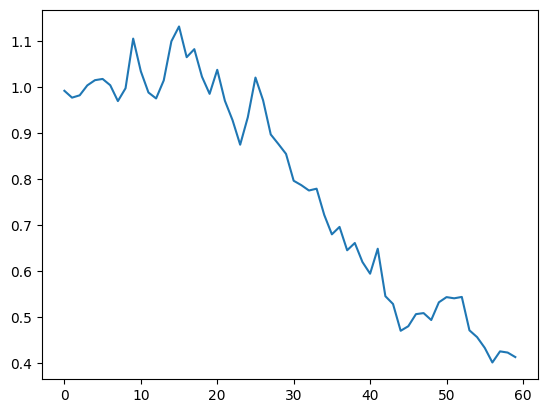

In [14]:
plt.plot(totals)

In [9]:
in_data = """2024	0.5	0.6	0.6	0.4	0.2	0.0	0.1	0.1	0.2	0.1	-0.1	0.0
2023	0.8	0.6	0.3	0.5	0.3	0.3	0.2	0.4	0.2	0.0	-0.2	-0.1
2022	0.8	0.9	1.3	0.6	1.1	1.4	0.0	0.0	0.2	0.4	-0.1	-0.3
2021	0.4	0.5	0.7	0.8	0.8	0.9	0.5	0.2	0.3	0.8	0.5	0.3
2020	0.4	0.3	-0.2	-0.7	0.0	0.5	0.5	0.3	0.1	0.0	-0.1	0.1
2019	0.2	0.4	0.6	0.5	0.2	0.0	0.2	0.0	0.1	0.2	-0.1	-0.1
2018	0.5	0.5	0.2	0.4	0.4	0.2	0.0	0.1	0.1	0.2	-0.3	-0.3
2017	0.6	0.3	0.1	0.3	0.1	0.1	-0.1	0.3	0.5	-0.1	0.0	-0.1
2016	0.2	0.1	0.4	0.5	0.4	0.3	-0.2	0.1	0.2	0.1	-0.2	0.0
2015	-0.5	0.4	0.6	0.2	0.5	0.4	0.0	-0.1	-0.2	0.0	-0.2	-0.3
2014	0.4	0.4	0.6	0.3	0.3	0.2	0.0	-0.2	0.1	-0.3	-0.5	-0.6
2013	0.3	0.8	0.3	-0.1	0.2	0.2	0.0	0.1	0.1	-0.3	-0.2	0.0
2012	0.4	0.4	0.8	0.3	-0.1	-0.1	-0.2	0.6	0.4	0.0	-0.5	-0.3
2011	0.5	0.5	1.0	0.6	0.5	-0.1	0.1	0.3	0.2	-0.2	-0.1	-0.2
2010	0.3	0.0	0.4	0.2	0.1	-0.1	0.0	0.1	0.1	0.1	0.0	0.2
2009	0.4	0.5	0.2	0.2	0.3	0.9	-0.2	0.2	0.1	0.1	0.1	-0.2
2008	0.5	0.3	0.9	0.6	0.8	1.0	0.5	-0.4	-0.1	-1.0	-1.9	-1.0
2007	0.3	0.5	0.9	0.6	0.6	0.2	0.0	-0.2	0.3	0.2	0.6	-0.1
2006	0.8	0.2	0.6	0.9	0.5	0.2	0.3	0.2	-0.5	-0.5	-0.1	0.1
2005	0.2	0.6	0.8	0.7	-0.1	0.1	0.5	0.5	1.2	0.2	-0.8	-0.4
2004	0.5	0.5	0.6	0.3	0.6	0.3	-0.2	0.1	0.2	0.5	0.1	-0.4
2003	0.4	0.8	0.6	-0.2	-0.2	0.1	0.1	0.4	0.3	-0.1	-0.3	-0.1
2002	0.2	0.4	0.6	0.6	0.0	0.1	0.1	0.3	0.2	0.2	0.0	-0.2
2001	0.6	0.4	0.2	0.4	0.5	0.2	-0.3	0.0	0.5	-0.3	-0.2	-0.4
2000	0.3	0.6	0.8	0.1	0.1	0.5	0.2	0.0	0.5	0.2	0.1	-0.1
1999	0.2	0.1	0.3	0.7	0.0	0.0	0.3	0.2	0.5	0.2	0.1	0.0
1998	0.2	0.2	0.2	0.2	0.2	0.1	0.1	0.1	0.1	0.2	0.0	-0.1
1997	0.3	0.3	0.3	0.1	-0.1	0.1	0.1	0.2	0.2	0.2	-0.1	-0.1
1996	0.6	0.3	0.5	0.4	0.2	0.1	0.2	0.2	0.3	0.3	0.2	0.0
1995	0.4	0.4	0.3	0.3	0.2	0.2	0.0	0.3	0.2	0.3	-0.1	-0.1
1994	0.3	0.3	0.3	0.1	0.1	0.3	0.3	0.4	0.3	0.1	0.1	0.0
1993	0.5	0.4	0.3	0.3	0.1	0.1	0.0	0.3	0.2	0.4	0.1	0.0
1992	0.1	0.4	0.5	0.1	0.1	0.4	0.2	0.3	0.3	0.4	0.1	-0.1
1991	0.6	0.1	0.1	0.1	0.3	0.3	0.1	0.3	0.4	0.1	0.3	0.1
1990	1.0	0.5	0.5	0.2	0.2	0.5	0.4	0.9	0.8	0.6	0.2	0.0
1989	0.5	0.4	0.6	0.7	0.6	0.2	0.2	0.2	0.3	0.5	0.2	0.2
1988	0.3	0.3	0.4	0.5	0.3	0.4	0.4	0.4	0.7	0.3	0.1	0.2
1987	0.6	0.4	0.4	0.5	0.4	0.4	0.3	0.5	0.5	0.3	0.1	0.0
1986	0.3	-0.3	-0.5	-0.2	0.3	0.6	0.0	0.2	0.5	0.1	0.1	0.1
1985	0.2	0.5	0.4	0.5	0.4	0.3	0.2	0.2	0.3	0.4	0.3	0.3
1984	0.6	0.5	0.2	0.5	0.3	0.3	0.4	0.4	0.5	0.3	0.0	0.0
1983	0.2	0.1	0.0	0.7	0.6	0.3	0.4	0.3	0.5	0.3	0.2	0.1
1982	0.3	0.3	-0.1	0.4	0.9	1.3	0.5	0.2	0.2	0.3	-0.2	-0.4
1981	0.8	1.0	0.7	0.7	0.8	0.9	1.1	0.8	1.0	0.2	0.3	0.3
1980	1.4	1.4	1.5	1.1	1.0	1.1	0.0	0.7	0.8	1.0	0.8	0.9
1979	0.9	1.2	1.0	1.1	1.3	1.1	1.1	1.0	1.1	0.8	0.9	1.1
1978	0.6	0.6	0.8	0.8	0.9	1.1	0.8	0.5	0.8	0.9	0.4	0.4
1977	0.5	1.0	0.7	0.8	0.5	0.7	0.5	0.3	0.3	0.3	0.5	0.3
1976	0.2	0.4	0.2	0.4	0.7	0.5	0.5	0.5	0.3	0.5	0.2	0.3
1975	0.4	0.8	0.4	0.4	0.6	0.8	1.1	0.2	0.6	0.5	0.7	0.4
1974	0.9	1.3	1.3	0.4	1.3	0.8	0.8	1.2	1.2	1.0	0.8	0.8
1973	0.2	0.7	0.9	0.7	0.7	0.7	0.2	1.8	0.2	0.9	0.7	0.7
1972	0.0	0.5	0.2	0.2	0.2	0.2	0.5	0.2	0.2	0.5	0.2	0.2
1971	0.0	0.3	0.3	0.3	0.5	0.7	0.2	0.2	0.0	0.2	0.0	0.5
1970	0.3	0.5	0.5	0.8	0.3	0.5	0.5	0.0	0.5	0.5	0.5	0.5
1969	0.3	0.6	0.8	0.6	0.3	0.5	0.5	0.5	0.3	0.5	0.5	0.5
1968	0.6	0.3	0.3	0.3	0.3	0.6	0.6	0.3	0.3	0.6	0.3	0.3
1967	0.0	0.0	0.3	0.3	0.3	0.3	0.3	0.3	0.3	0.3	0.3	0.3
1966	0.0	0.6	0.3	0.6	0.0	0.3	0.3	0.6	0.0	0.6	0.0	0.0
1965	0.0	0.0	0.3	0.3	0.0	0.6	0.0	0.0	0.0	0.3	0.0	0.3
1964	0.0	0.0	0.0	0.0	0.0	0.3	0.3	-0.3	0.3	0.0	0.3	0.0
1963	0.0	0.0	0.3	0.0	0.0	0.3	0.3	0.0	0.0	0.3	0.0	0.3
1962	0.0	0.3	0.0	0.3	0.0	0.0	0.3	0.0	0.3	0.0	0.0	0.0
1961	0.0	0.0	0.0	0.0	0.0	0.0	0.7	-0.3	0.3	0.0	0.0	0.0
1960	-0.3	0.3	0.0	0.3	0.0	0.3	0.0	0.0	0.0	0.7	0.0	0.0
1959	0.3	-0.3	0.0	0.3	0.0	0.3	0.3	0.0	0.3	0.3	0.0	0.0
1958	0.7	0.0	0.7	0.3	0.0	0.0	0.3	-0.3	0.0	0.0	0.3	-0.3
1957	0.0	0.4	0.4	0.4	0.4	0.4	0.7	0.0	0.0	0.0	0.4	0.0
1956	0.0	0.0	0.0	0.4	0.4	0.7	0.7	-0.4	0.4	0.4	0.0	0.4
1955	0.0	0.0	0.0	0.0	0.0	0.0	0.4	0.0	0.4	0.0	0.0	-0.4
1954	0.0	0.0	0.0	-0.4	0.4	0.0	0.0	0.0	-0.4	0.0	0.0	-0.4
1953	-0.4	-0.4	0.4	0.0	0.4	0.4	0.0	0.4	0.0	0.4	-0.4	0.0
1952	0.0	-0.8	0.0	0.4	0.0	0.4	0.8	0.0	0.0	0.0	0.0	0.0
1951	1.6	1.2	0.4	0.0	0.4	0.0	0.0	0.0	0.8	0.4	0.8	0.4
1950	-0.4	0.0	0.4	0.0	0.4	0.4	1.3	0.8	0.4	0.8	0.4	1.2
1949	-0.4	-0.8	0.0	0.4	-0.4	0.4	-0.8	0.4	0.4	-0.8	0.4	-0.8
1948	1.3	-0.8	-0.4	1.7	0.4	0.8	1.2	0.4	0.0	-0.4	-0.8	-0.4
1947	0.0	0.0	1.9	0.0	0.0	0.5	0.9	1.4	2.2	0.0	0.4	1.3
1946	0.0	-0.5	1.1	0.5	0.5	1.1	5.9	2.0	1.0	2.0	2.4	0.9
1945	0.0	0.0	0.0	0.0	0.6	1.1	0.0	0.0	0.0	0.0	0.0	0.6
1944	0.0	0.0	0.0	0.6	0.0	0.6	0.6	0.0	0.0	0.0	0.0	0.6
1943	0.0	0.0	1.8	1.2	0.6	0.0	-0.6	-0.6	0.6	0.0	0.0	0.0
1942	1.3	0.6	1.3	0.6	1.2	0.0	0.6	0.6	0.0	1.2	0.6	0.6
1941	0.0	0.0	0.7	0.7	0.7	2.1	0.0	1.4	1.3	1.3	0.7	0.6
1940	-0.7	0.7	0.0	0.0	0.0	0.7	-0.7	0.0	0.0	0.0	0.0	0.7
1939	0.0	-0.7	0.0	-0.7	0.0	0.0	0.0	0.0	2.2	-0.7	0.0	0.0
1938	-1.4	-0.7	0.0	0.7	-0.7	0.0	0.0	0.0	0.0	-0.7	0.0	0.0
1937	0.7	0.0	0.7	0.7	0.7	0.0	0.7	0.0	0.7	0.0	-0.7	-0.7
1936	0.0	0.0	-0.7	0.0	0.0	0.7	0.7	0.7	0.0	0.0	0.0	0.0
1935	1.5	0.7	0.0	0.7	0.0	-0.7	0.0	0.0	0.0	0.0	0.7	0.0
1934	0.0	0.8	0.0	0.0	0.0	0.8	0.0	0.0	1.5	-0.7	0.0	-0.7
1933	-1.5	-1.6	-0.8	0.0	0.0	0.8	3.1	0.8	0.0	0.0	0.0	0.0
1932	-2.1	-1.4	-0.7	-0.7	-1.4	-0.7	0.0	-0.7	-0.7	-0.7	-0.8	-0.8
1931	-1.2	-1.3	-0.6	-0.6	-1.3	-1.3	0.0	0.0	-0.7	-0.7	-1.3	-0.7
1930	-0.6	-0.6	-0.6	0.6	-0.6	-0.6	-1.2	-0.6	0.6	-0.6	-0.6	-1.8
1929	0.0	0.0	-0.6	-0.6	0.6	0.6	1.2	0.0	0.0	0.0	0.0	-0.6
1928	0.0	-1.2	0.0	0.0	0.6	-0.6	0.0	0.0	1.2	-0.6	0.0	-0.6
1927	-1.1	-0.6	-0.6	0.0	0.6	1.1	-1.7	-0.6	0.6	0.6	-0.6	0.0
1926	0.0	0.0	-0.6	0.6	-0.6	-0.6	-1.1	-0.6	0.6	0.6	0.6	0.0
1925	0.0	-0.6	0.6	-0.6	0.6	1.2	1.1	0.0	0.0	0.0	1.7	-0.6
1924	0.0	-0.6	-0.6	-0.6	0.0	0.0	0.6	-0.6	0.6	0.6	0.0	0.6
1923	-0.6	0.0	0.0	0.6	0.0	0.6	1.2	-0.6	0.6	0.6	0.0	0.0
1922	-2.3	0.0	-1.2	0.0	0.0	0.0	0.6	-1.2	0.0	0.6	0.6	0.6
1921	-2.1	-3.2	-0.5	-1.1	-2.2	-0.6	0.6	0.0	-1.1	0.0	-0.6	-0.6
1920	2.1	1.0	1.0	3.0	1.5	1.5	-0.5	-2.4	-1.5	-0.5	-0.5	-2.0
1919	0.0	-1.8	1.2	1.8	1.2	0.0	3.0	1.7	0.6	1.7	2.2	2.2
1918	2.2	0.7	-0.7	1.4	2.1	1.4	2.7	2.0	1.9	1.9	1.9	1.2
1917	0.9	2.6	0.0	5.0	1.6	1.6	-1.5	1.6	2.3	1.5	0.0	1.5
1916	1.0	0.0	1.0	1.0	0.9	0.9	0.0	0.9	1.8	1.8	1.8	0.9
1915	0.0	-1.0	-1.0	1.0	1.0	0.0	0.0	0.0	0.0	1.0	1.0	0.0
1914	0.0	-1.0	0.0	-1.0	1.0	0.0	1.0	2.0	0.0	-1.0	1.0	-1.0"""

In [11]:
import csv


# Parse data into list of floats
lines = in_data.strip().split('\n')
monthly_values = []

# Sort years ascending
lines = sorted(lines, key=lambda x: int(x.split()[0]))

for line in lines:
    parts = line.strip().split('\t')
    values = list(map(float, parts[1:]))
    monthly_values.extend(values)

print(monthly_values)

# Calculate returns: (current - prev) / prev


# Write to CSV
with open('./data/inflation_historic.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for r in monthly_values:
        writer.writerow([r])

[0.0, -1.0, 0.0, -1.0, 1.0, 0.0, 1.0, 2.0, 0.0, -1.0, 1.0, -1.0, 0.0, -1.0, -1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.9, 0.9, 0.0, 0.9, 1.8, 1.8, 1.8, 0.9, 0.9, 2.6, 0.0, 5.0, 1.6, 1.6, -1.5, 1.6, 2.3, 1.5, 0.0, 1.5, 2.2, 0.7, -0.7, 1.4, 2.1, 1.4, 2.7, 2.0, 1.9, 1.9, 1.9, 1.2, 0.0, -1.8, 1.2, 1.8, 1.2, 0.0, 3.0, 1.7, 0.6, 1.7, 2.2, 2.2, 2.1, 1.0, 1.0, 3.0, 1.5, 1.5, -0.5, -2.4, -1.5, -0.5, -0.5, -2.0, -2.1, -3.2, -0.5, -1.1, -2.2, -0.6, 0.6, 0.0, -1.1, 0.0, -0.6, -0.6, -2.3, 0.0, -1.2, 0.0, 0.0, 0.0, 0.6, -1.2, 0.0, 0.6, 0.6, 0.6, -0.6, 0.0, 0.0, 0.6, 0.0, 0.6, 1.2, -0.6, 0.6, 0.6, 0.0, 0.0, 0.0, -0.6, -0.6, -0.6, 0.0, 0.0, 0.6, -0.6, 0.6, 0.6, 0.0, 0.6, 0.0, -0.6, 0.6, -0.6, 0.6, 1.2, 1.1, 0.0, 0.0, 0.0, 1.7, -0.6, 0.0, 0.0, -0.6, 0.6, -0.6, -0.6, -1.1, -0.6, 0.6, 0.6, 0.6, 0.0, -1.1, -0.6, -0.6, 0.0, 0.6, 1.1, -1.7, -0.6, 0.6, 0.6, -0.6, 0.0, 0.0, -1.2, 0.0, 0.0, 0.6, -0.6, 0.0, 0.0, 1.2, -0.6, 0.0, -0.6, 0.0, 0.0, -0.6, -0.6, 0.6, 0.6, 1.2, 0.0, 0.0, 0